In [7]:
from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings('ignore')

In [8]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('../../data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [9]:
data.head(3)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [15]:
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')

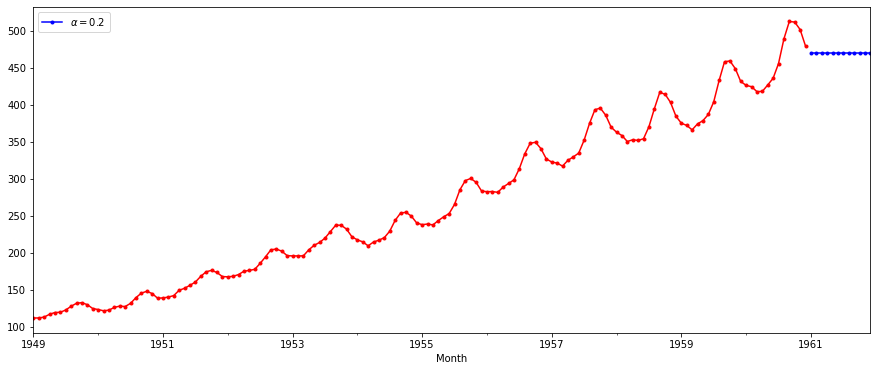

In [16]:
fcast1.plot(marker='.', color='blue', legend=True)
fit1.fittedvalues.plot(marker='.', color='red');

In [14]:
fcast1

1961-01-01    469.630092
1961-02-01    469.630092
1961-03-01    469.630092
1961-04-01    469.630092
1961-05-01    469.630092
1961-06-01    469.630092
1961-07-01    469.630092
1961-08-01    469.630092
1961-09-01    469.630092
1961-10-01    469.630092
1961-11-01    469.630092
1961-12-01    469.630092
Freq: MS, Name: $alpha=0.2$, dtype: float64

In [18]:
# Otimizando o valor de alpha
fit2 = SimpleExpSmoothing(data).fit()
fcast2 = fit2.forecast(12).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])

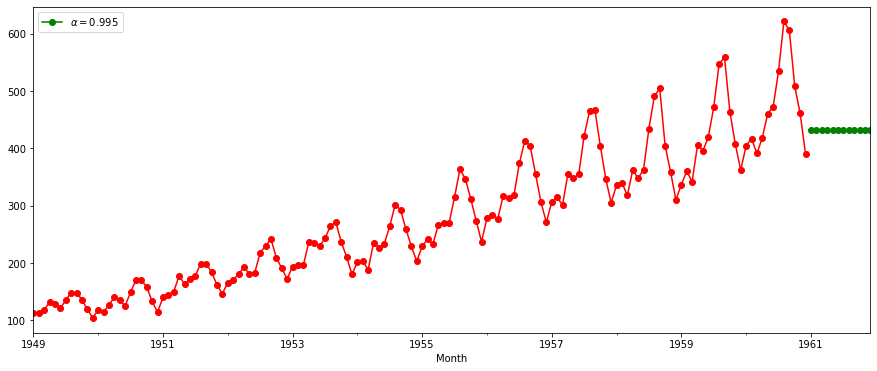

In [20]:
fcast2.plot(marker='o', color='green', legend=True)
fit2.fittedvalues.plot(marker='o', color='r');